<a href="https://colab.research.google.com/github/zaedulislam/PyTorch_for_Deep_Learning_and_Computer_Vision/blob/main/Section%208%20-%20Convolutional%20Neural%20Networks%20-%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 53. Convolutions and MNIST

### Limitations of ANN

Convolutional neural networks have changed the way we classify images because they are very effective at recognizing useful patterns within the images by understanding that spatial structure of the inputs is relevant.

1. While typical neural networks ignore these spatial relevance of pixels, such as pixels being closer together versus pixels that are further apart, convolutional networks are designed to use the spatial data for their benefit.

2. Convolutional networks also require a lower quantity of parameters when compared to artificial neural networks.

3. The problem with traditional neural neural networks is that it isn't scalable to much larger images or even colored images with multiple channels.

4. A single node on the first hidden layer, a single neuron was parametrized
by **784** adjustable **weights** as it's connected to **784** input nodes. For a RGB iamge with 3 channels, it has to deal with **15552** pixels which has a higher computational complexity.


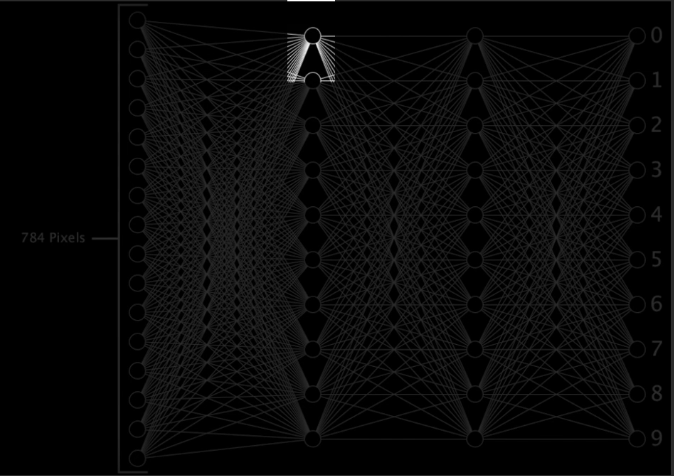

5. Another drawback of using regular neural networks was overfitting, which occurs when a model tailor is itself a very closely to the data that it has been trained on reducing its ability to pinpoint generalised features of test data sets that it hasn't seen before.

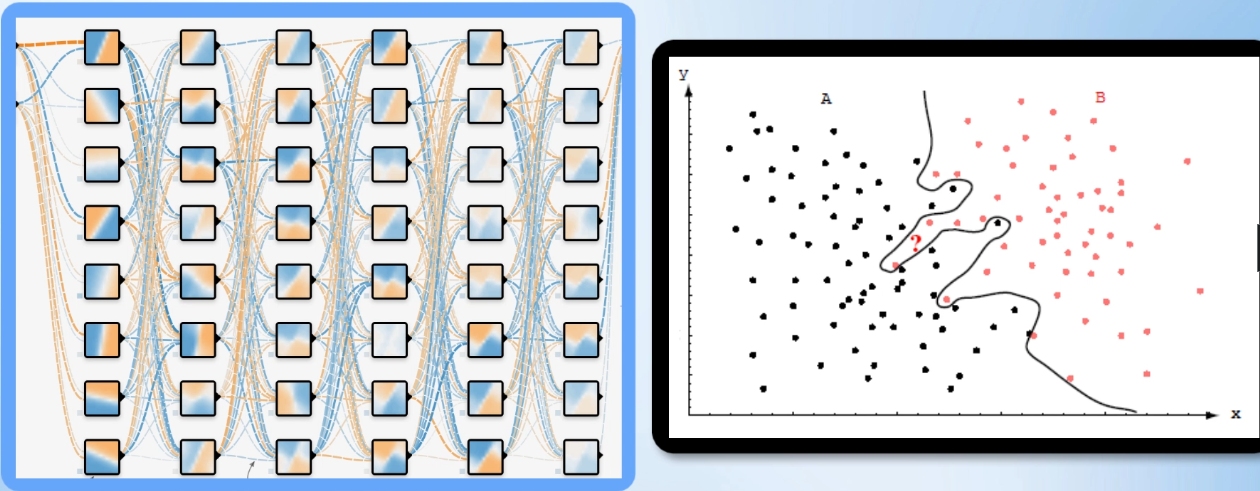

### Similarities of ANN & CNN

1. One obvious similarity between a convolutional neural network and a regular neural network is the input layer.

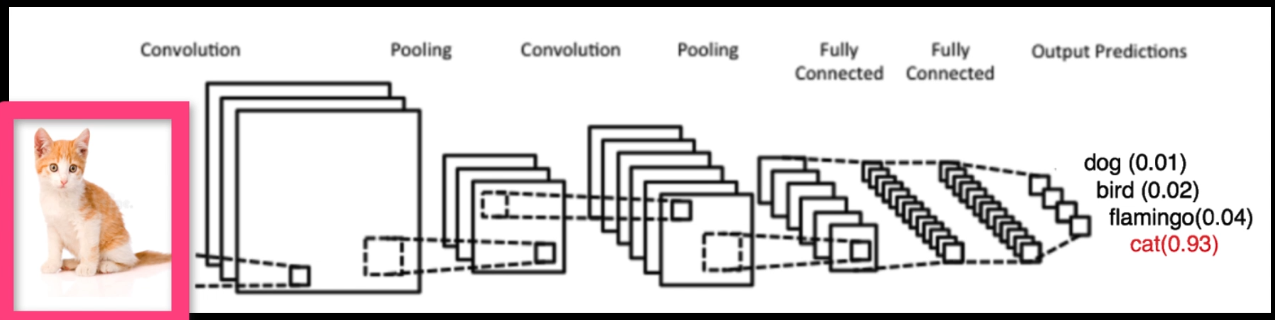

2. Another similarity is the fully connected layer, which essentially is just a multilayer Perceptron parametrized by weights and biased values that make use of the **softmax activation** function in the output layer, which, after many convolutions, outputs the probabilities of the image belonging to some class appropriately. The highest probability belongs to the image being a cat.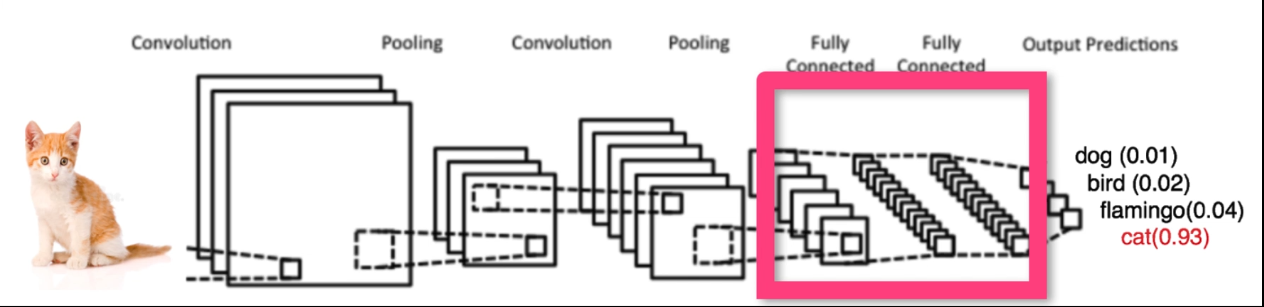

### Advantages of CNN

1. Convolutional neural networks make image processing computationally manageable. Convolutional neural networks are known to process data that has a known **grid like** the apology and as such will be using convolutional neural networks to solve **image driven pattern recognition tasks**.

2. To alleviate the issue of overfitting, convolutional neural networks can make use of what's called pooling layers, which will act to continuously reduce the number of parameters and computations in the network.

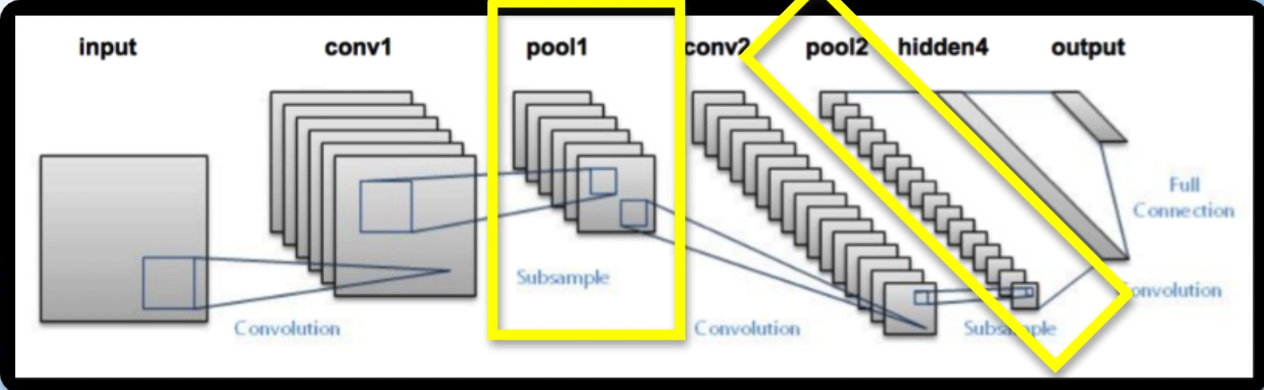

# 58. Neural Network Implementation with PyTorch

## Preliminary Installations

In [1]:
!pip3 install torch
!pip3 install torchvision
 
# Alternatively, both packages can be installed in one line using the following command
# !pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Relevant Libraries

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# PIL -> Python Image Library
import PIL
import requests

from torch import nn
from torchvision import datasets, transforms

## Model Class Constructor

In [3]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 5, stride = 1)

        # First fully-connected layer
        self.fullyConnectedLayer1 = nn.Linear(in_features = 4* 4 * 50, out_features = 500)

        # Second fully-connected layer
        self.fullyConnectedLayer2 = nn.Linear(in_features = 500, out_features = 10)
    
    def forward(self, x):
        # Connecting to first convolutional layer
        x = F.relu(self.conv1(x))

        # args: Feed-forward x value
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        # Reshaping the output to match the desired shape of first fully-connected layer
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fullyConnectedLayer1(x))

        # We don't apply relu(...) activation function at this step because we will use nn.CrossEntropyLoss()
        x = self.fullyConnectedLayer2(x)

        return x